In [1]:
import os, sys, json, webbrowser
import spotipy
import lyricsgenius
import pandas as pd
import nltk
import spotipy.util as util
import spotipy.oauth2 as oauth2
from json.decoder import JSONDecodeError
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot

In [2]:
username = 'g64129687775'
client_id = 'd576e9eb16044adbaa2d22688fc73dd0'
client_secret = '7b5cc4d0a7ce40ee9f8c0ea42aba241b'
redirect_uri = 'http://google.co.uk'
scope='user-read-recently-played'

In [3]:
token = SpotifyOAuth(client_id=client_id,client_secret=client_secret,redirect_uri=redirect_uri,scope=scope,username=username,show_dialog=True)
genius_access_token = 'cQ15SgX_iCubNYTUW2pivTNrZbHmUIBHlzUHg2GEbDbrFUmzEVaRFE9BPvefe2io'

spotifyObject = spotipy.Spotify(auth_manager=token)
geniusObject = lyricsgenius.Genius(genius_access_token)

analyser = SentimentIntensityAnalyzer()


In [4]:
results = spotifyObject.current_user_recently_played(limit=50, after=None, before=None) #This line opens up a page in the browser

recents = results['items']
while results['next']:
    results = spotifyObject.next(results)
    recents.extend(results['items'])


In [5]:
songs = []
for recent in recents:
    features = spotifyObject.audio_features(recent['track']['id'])[0]
    song = geniusObject.search_song(title=recent['track']['name'], artist=recent['track']['artists'][0]['name'])


    try:
        annotation = geniusObject.song_annotations(song.id)
        lyric_score = analyser.polarity_scores(song.to_text())
        annotation_score = analyser.polarity_scores(song.to_text())
    except:
        pass
    songs.append({
    'name' : recent['track']['name'],
    'artists' : [d['name'] for d in recent['track']['artists']],
    #'features' : features,
    'acousticness' : features['acousticness'],
    'danceability' : features['danceability'],
    'duration_ms' : features['duration_ms'],
    'energy' : features['energy'],
    'instrumentalness' : features['instrumentalness'],
    'key' : features['key'],
    'liveness' : features['liveness'],
    'loudness' : features['loudness'],
    'mode' : features['mode'],
    'speechiness' : features['speechiness'],
    'tempo' : features['tempo'],
    'time_signature' : features['time_signature'],
    'valence' : features['valence'],
    'played_at' : recent['played_at'],
    'lyrics' : song.lyrics if song else None,
    'annotations' : annotation,
    'nlp_lyrics' : lyric_score['compound'] if lyric_score else None,
    'nlp_annotations' : annotation_score['compound'] if annotation_score else None,
    'valence+nlp' : round(features['valence']+(lyric_score['compound']+annotation_score['compound'])/100, 4) 
    })

Searching for "ocean floor" by wave to earth...
Done.
Searching for "Who Hurt You?" by Daniel Caesar...
Done.
Searching for "Ivy" by Frank Ocean...
Done.
Searching for "xoxosos" by keshi...
Done.
Searching for "Jocelyn Flores" by XXXTENTACION...
Done.
Searching for "Butterfly" by UMI...
Done.
Searching for "Coaster" by Khalid...
Done.
Searching for "Last Time (feat. Snoh Aalegra)" by Giveon...
Done.
Searching for "talk is overrated" by Jeremy Zucker...
Done.
Searching for "Girls Need Love (with Drake) - Remix" by Summer Walker...
Done.
Searching for "Girls Need Love" by Summer Walker...
Done.
Searching for "Viva La Vida" by Coldplay...
Done.
Searching for "Temperature Rising" by Tory Lanez...
Done.
Searching for "Playing Games (with Bryson Tiller) - Extended Version" by Summer Walker...
No results found for: 'Playing Games (with Bryson Tiller) - Extended Version Summer Walker'
Searching for "Out of the Blue" by RINI...
Done.
Searching for "Ugotme" by Omar Apollo...
Done.
Searching for 

In [6]:
recents = results['items']
while results['next']:
    results = spotifyObject.next(results)
    recents.extend(results['items'])

#print(json.dumps(recents, sort_keys=True, indent=4))


In [7]:
df = pd.DataFrame(songs)
df[['name', 'artists', 'valence','energy', 'nlp_lyrics','nlp_annotations','valence+nlp', 'played_at']]

,name,artists,valence,energy,nlp_lyrics,nlp_annotations,valence+nlp,played_at
0,ocean floor,[wave to earth],0.2790,0.510,0.8986,0.8986,0.2970,2021-05-20T00:47:13.414Z
1,Who Hurt You?,[Daniel Caesar],0.2770,0.493,0.9938,0.9938,0.2969,2021-05-19T12:48:12.749Z
2,Ivy,[Frank Ocean],0.4520,0.388,0.1996,0.1996,0.4560,2021-05-19T12:34:21.114Z
3,xoxosos,[keshi],0.2570,0.401,0.4260,0.4260,0.2655,2021-05-19T12:30:11.160Z
4,Jocelyn Flores,[XXXTENTACION],0.4370,0.391,-0.9917,-0.9917,0.4172,2021-05-19T12:27:37.254Z
5,Butterfly,[UMI],0.1200,0.270,0.9726,0.9726,0.1395,2021-05-19T12:25:37.863Z
6,Coaster,[Khalid],0.2440,0.219,-0.6374,-0.6374,0.2313,2021-05-19T12:22:57.551Z
7,Last Time (feat. Snoh Aalegra),"[Giveon, Snoh Aalegra]",0.3960,0.427,0.9959,0.9959,0.4159,2021-05-19T12:18:57.972Z
8,talk is overrated,"[Jeremy Zucker, blackbear]",0.6580,0.353,0.7215,0.7215,0.6724,2021-05-19T12:14:12.295Z
9,Girls Need Love (with Drake) - Remix,"[Summer Walker, Drake]",0.0897,0.432,0.8832,0.8832,0.1074,2021-05-19T12:10:23.375Z


In [17]:
for index, row in df.iterrows():
    print(index, row['name'], '-', ''.join(row['artists']))

0 ocean floor - wave to earth
1 Who Hurt You? - Daniel Caesar
2 Ivy - Frank Ocean
3 xoxosos - keshi
4 Jocelyn Flores - XXXTENTACION
5 Butterfly - UMI
6 Coaster - Khalid
7 Last Time (feat. Snoh Aalegra) - GiveonSnoh Aalegra
8 talk is overrated - Jeremy Zuckerblackbear
9 Girls Need Love (with Drake) - Remix - Summer WalkerDrake
10 Girls Need Love - Summer Walker
11 Viva La Vida - Coldplay
12 Temperature Rising - Tory Lanez
13 Playing Games (with Bryson Tiller) - Extended Version - Summer WalkerBryson Tiller
14 Out of the Blue - RINI
15 Ugotme - Omar Apollo
16 Emerald - RINI
17 Girls Need Love (with Drake) - Remix - Summer WalkerDrake
18 Walking Home - Mac Ayres
19 SUGAR - BROCKHAMPTON
20 Stuck On You - Giveon
21 instagram - DEAN
22 Exchange - Bryson Tiller
23 Dance - offonoff
24 Erase - Omar Apollo
25 Stuck On You - Giveon
26 Inhale - Bryson Tiller
27 Sanctuary - Joji
28 the reaper - keshi
29 North Face - ODIE
30 Myself - NAV
31 Yeah Yeah - Jaden
32 Better - Khalid
33 Love Galore (feat. 

In [40]:
import json
y = json.dumps(df['valence'].tolist())
y

'[0.279, 0.277, 0.452, 0.257, 0.437, 0.12, 0.244, 0.396, 0.658, 0.0897, 0.122, 0.417, 0.0769, 0.459, 0.227, 0.401, 0.349, 0.0897, 0.455, 0.516, 0.141, 0.219, 0.276, 0.407, 0.575, 0.141, 0.507, 0.316, 0.277, 0.581, 0.0859, 0.358, 0.116, 0.409, 0.257, 0.779, 0.53, 0.397, 0.473, 0.219, 0.624, 0.658, 0.471, 0.667, 0.236, 0.497]'

In [34]:
# def convertDateTime():
timestamp = '2016-12-13T20:44:04.589Z'
date = timestamp[0:10]
time = timestamp[11:16]

In [49]:
reverse = df.iloc[::-1].reset_index()
reverse = reverse.drop(columns='index')
reverse

,name,artists,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,valence,played_at,lyrics,annotations,nlp_lyrics,nlp_annotations,valence+nlp
0,Lost,[Frank Ocean],0.02720,0.913,234093,0.603,0.000503,8,0.1670,-4.892,...,0.2260,123.061,4,0.4970,2021-05-17T11:46:33.062Z,[Verse 1]\nDouble D\nBig full breasts on my ba...,[(No I don’t really wish\n I don’t wish the ti...,-0.9915,-0.9915,0.4772
1,Moonlight in Atlanta,[Russ],0.89100,0.514,163500,0.320,0.000000,9,0.0977,-9.669,...,0.1440,76.916,4,0.2360,2021-05-17T11:50:29.017Z,[Intro]\nI just wanna...\nLet you know\nBaby l...,[],0.9774,0.9774,0.2555
2,At My Worst,[Pink Sweat$],0.77700,0.813,170345,0.415,0.000000,0,0.1310,-5.926,...,0.0349,91.921,4,0.6670,2021-05-17T11:53:19.736Z,[Verse 1]\nCan I call you baby? Can you be my ...,[],-0.9656,-0.9656,0.6477
3,"she likes spring, I prefer winter",[slchld],0.55200,0.326,207436,0.660,0.000000,9,0.2640,-6.680,...,0.0674,78.290,4,0.4710,2021-05-17T11:56:47.721Z,[Verse 1]\nStay by the fire\nYou're giving loo...,[],0.9957,0.9957,0.4909
4,talk is overrated,"[Jeremy Zucker, blackbear]",0.43500,0.776,189800,0.353,0.000000,4,0.3020,-8.317,...,0.0687,138.035,4,0.6580,2021-05-17T11:59:57.947Z,"[Verse 1: Jeremy Zucker]\nI don't wanna smoke,...","[(I don’t wanna smoke, I don’t need a drink\n ...",0.7215,0.7215,0.6724
5,Hit Me Up,"[Omar Apollo, Dominic Fike, Kenny Beats]",0.36300,0.773,160000,0.620,0.000002,9,0.1750,-5.252,...,0.1030,84.975,4,0.6240,2021-05-17T12:02:37.793Z,"[Chorus: Omar Apollo]\nUh, said I've got some ...","[(Nobody listens to the radio, baby, [['Radio ...",0.9714,0.9714,0.6434
6,instagram,[DEAN],0.19600,0.463,255729,0.566,0.000000,8,0.2840,-6.195,...,0.1450,93.921,4,0.2190,2021-05-17T12:06:53.939Z,[Verse 1]\n내일이 올 걸 아는데\n난 핸드폰을 놓지 못해\n잠은 올 생각이...,"[(이 피드 속엔\n 나완 다른 세상 뿐인데, [['Inside this feed\...",-0.7579,-0.7579,0.2038
7,Chanel,[Frank Ocean],0.87400,0.776,210285,0.503,0.000000,0,0.1120,-5.732,...,0.2370,110.134,4,0.4730,2021-05-17T12:10:25.814Z,[Verse 1]\nMy guy pretty like a girl\nAnd he g...,"[(I know you need to try for my belt, [['Champ...",0.9697,0.9697,0.4924
8,Jasmine,[DPR LIVE],0.33100,0.597,201511,0.486,0.000000,8,0.1400,-5.893,...,0.0986,137.680,4,0.3970,2021-05-17T12:13:47.142Z,[Pre-Chorus]\nYou know I can paint the world\n...,"[(난 널 아낄 수 있고 또 소중히 다룰 수 있어, [['Live is tellin...",0.9709,0.9709,0.4164
9,BS,[Still Woozy],0.50300,0.616,133987,0.458,0.003500,3,0.1150,-11.832,...,0.0455,79.574,3,0.5300,2021-05-17T12:16:01.787Z,"[Intro]\n(Scared, scared)\nDon't be mad, I kno...",[],0.9550,0.9550,0.5491


<AxesSubplot:xlabel='played_at'>

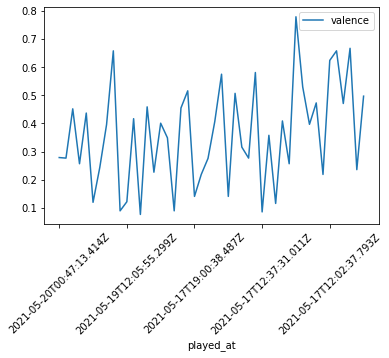

In [29]:
df.plot.line(x='played_at', y='valence', rot=45)

<AxesSubplot:xlabel='played_at'>

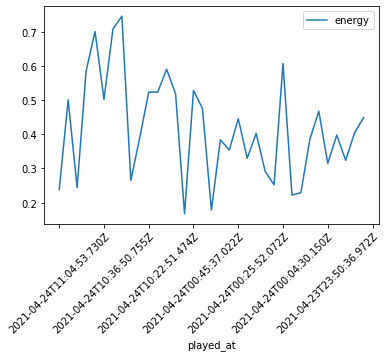

In [9]:
df.plot.line(x='played_at', y='energy', rot=45)

<AxesSubplot:xlabel='valence+nlp', ylabel='energy'>

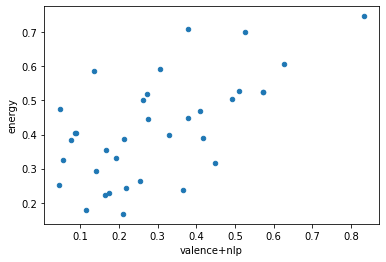

In [10]:
df.plot.scatter(x='valence+nlp', y='energy')